# Project- classifying flowers using the famous Iris Dataset through the use of Support Vector Machines. 

## Loading the data:

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

In [2]:
iris = sns.load_dataset('iris')
#print(type(iris))
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exploratory Data Analysis:

### Creating a pairplot of the flower data:

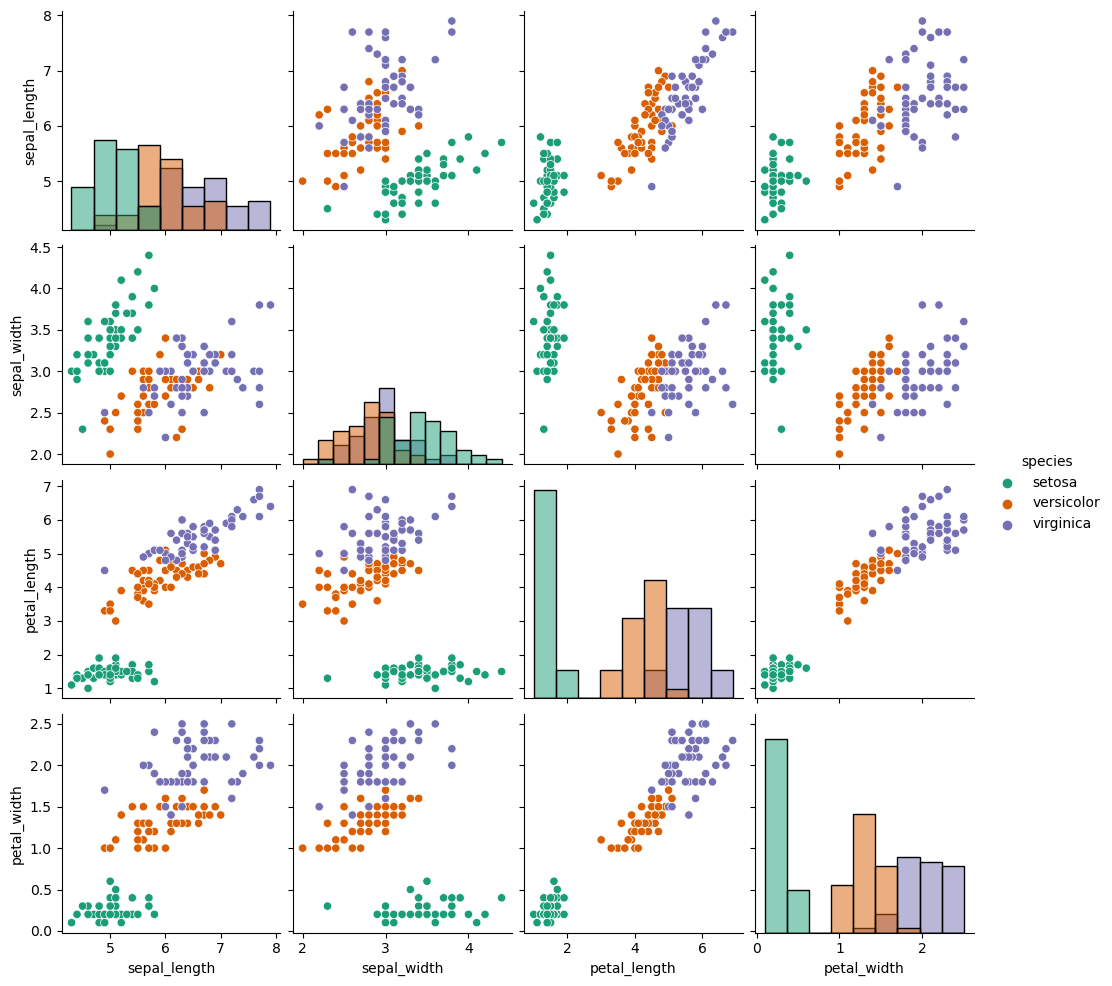

In [3]:
sns.pairplot(data = iris, diag_kind='hist',hue = 'species', palette = 'Dark2' )

**Creating a kde plot of sepal_length versus sepal width for setosa species of flower:**

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

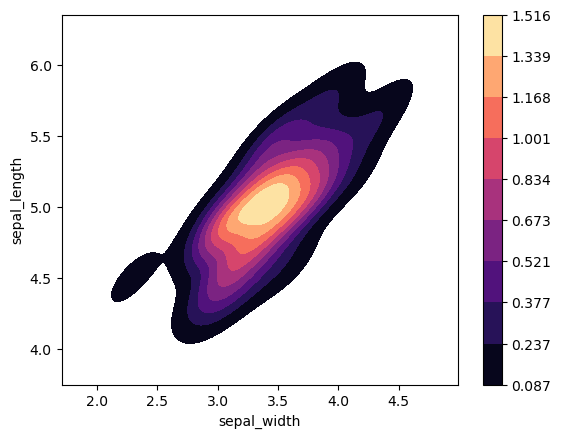

In [4]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot(data = setosa, x= setosa['sepal_width'],y=setosa['sepal_length'], cmap='magma',cbar = True,fill=True)

# Train Test Split

**Splitting the data into training data and testing data. This is typical in all machine learning algorithms!**

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = iris.drop('species', axis = 1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

# Training the  Support Vector Machine (SVC) Model: 

In [7]:
from sklearn.svm import SVC

In [8]:
svc_mod = SVC()

In [9]:
svc_mod.fit(X_train,y_train)

SVC()

## Model Evaluation:

In [10]:
prediction = svc_mod.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix , classification_report

In [12]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [13]:
print(confusion_matrix(y_test,prediction))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


### The SVC model works very well for this dataset!

## Now implementing the Gridsearch and SVC algorithms to compare it to the SVC model alone:

In [14]:
from sklearn.model_selection import GridSearchCV

**Mapping the parameters of the gridsearch algorithm.**

In [16]:
parameter_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}

** Create a GridSearchCV object and fit it to the training data.**

In [17]:
grid_search = GridSearchCV(estimator = SVC(), param_grid=parameter_grid, verbose = 3)

In [18]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.857 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.810 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.857 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.524 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=3)

### Creating the model:

In [19]:
grid_search_predictions = grid_search.predict(X_test)

In [20]:
print(confusion_matrix(y_test,grid_search_predictions))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [21]:
print(classification_report(y_test,grid_search_predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



**For this dataset both the SVC model and the gridsearch SVC model work very well.**